In [69]:
import cv2
import matplotlib.pyplot as plt
import easyocr
import imutils
import numpy as np


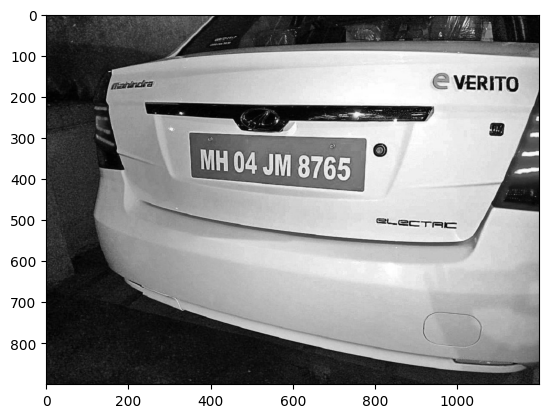

In [84]:
img=cv2.imread('1.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

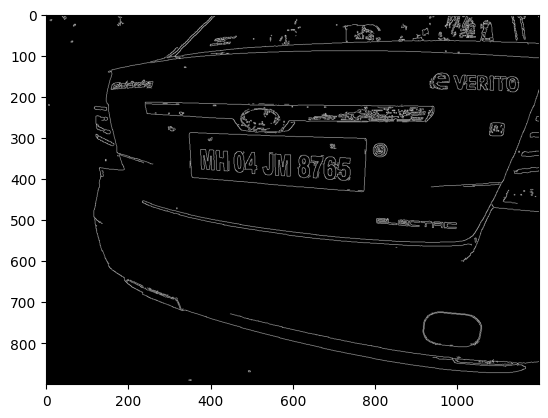

In [71]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [72]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [73]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break

In [74]:
location

array([[[348, 292]],

       [[356, 397]],

       [[774, 428]],

       [[777, 302]]], dtype=int32)

In [75]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask, [location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)


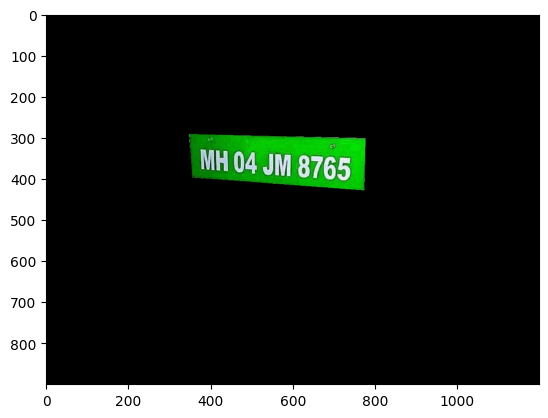

In [76]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [77]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

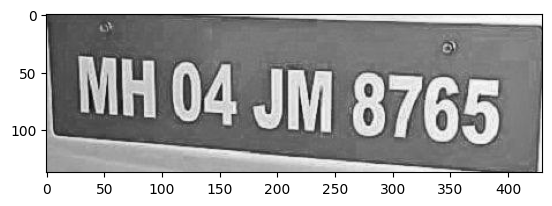

In [78]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [79]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[16, 26], [407, 26], [407, 125], [16, 125]],
  'MH 04 JM 8765',
  0.9273592914230485)]

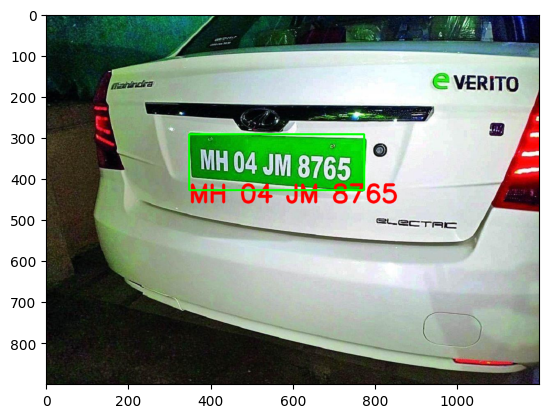

In [81]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=2, color=(0,0,255), thickness=5, lineType=cv2.LINE_AA)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))